In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# img = np.load(Path()/"spacio_training_2/validation_images/42204-24072023.npy") # No pos embd
img = np.load(Path()/"spacio_training_2/validation_images/42680-27072023.npy") # Original
# img = np.load(Path()/"spacio_training_2/validation_images/42140-22072023.npy") # Concat pos embd

geo = np.load(Path()/"spacio_training_2/processed/93_0_geom.npy")
mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
truth = np.load(Path()/"spacio_training_2/processed/93_U_0_2.npy")
truth[mask] = [0,0,0]
img[mask] = [0,0,0]

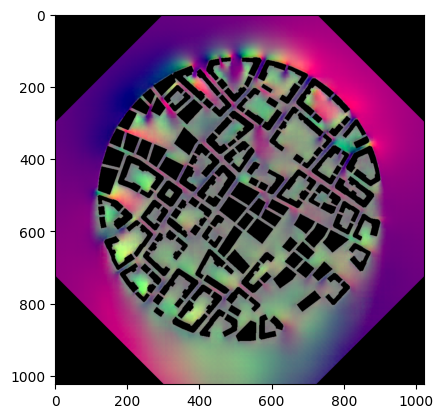

In [4]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


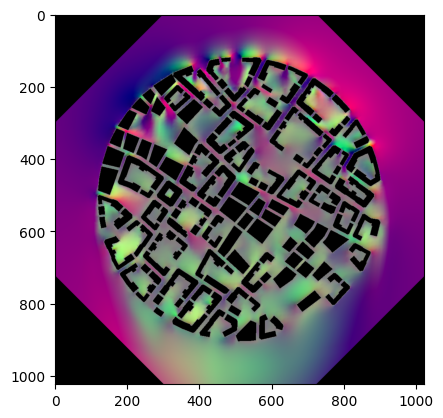

In [5]:
plt.imshow(truth)

In [6]:
diff = abs(truth - img)
ux = (diff[:,:,0])*6
uy = (diff[:,:,1])*4
uz = (diff[:,:,2])*2
mag = np.sqrt(ux**2 + uy**2 + uz**2)

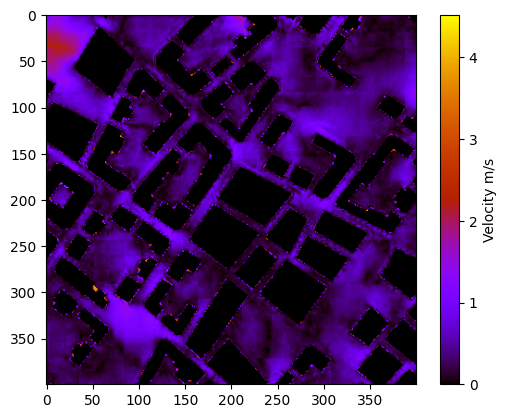

In [7]:
ux = (diff[:,:,0] * 6)-3
# ux[mask] = [0]
plt.imshow(mag[300:700,300:700], cmap='gnuplot')
plt.colorbar(label="Velocity m/s")
plt.savefig("Mag Velocity error.png")

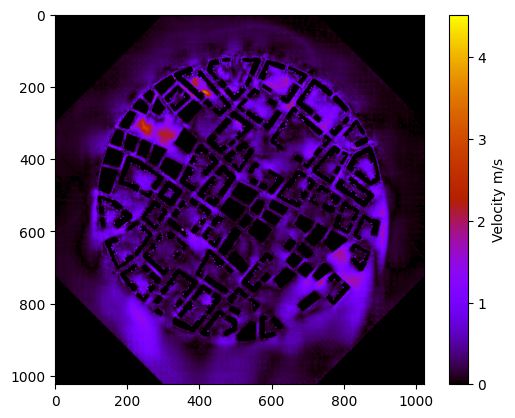

In [8]:
ux = (diff[:,:,0] * 6)-3
plt.imshow(mag, cmap='gnuplot')
plt.colorbar(label="Velocity m/s")
plt.savefig("Mag Velocity error.png")

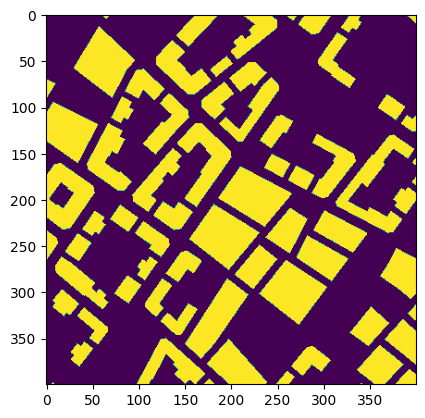

In [9]:
mag[mask] = [999]
mag = mag[300:700, 300:700]
plt.imshow(mag)

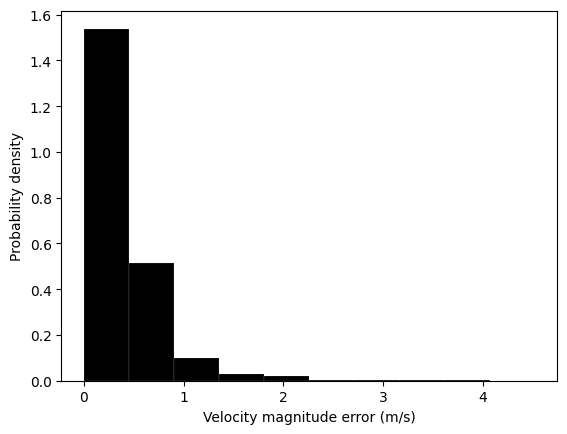

In [10]:
values, bins, _ = plt.hist(mag[mag<99], density=True, color="black", edgecolor='white', linewidth=.1)
plt.xlabel("Velocity magnitude error (m/s)")
plt.ylabel("Probability density")
plt.savefig("Velocity_mag_error_pdf.png")

bin_start = bins[:-1]
bin_end = bins[1:]
bin_widths = bins[1:] - bins[:-1]

with open('your_file.csv', 'w') as f:
    for line in list(zip(bin_start, bin_end, bin_widths, values)):

        f.write(f"{line[0]},{line[1]},{line[2]},{line[3]}\n")

In [80]:
for line in list(zip(bin_widths, values)):
    print(line[0])

0.4173694394994527
0.41736942529678345
0.41736942529678345
0.4173694849014282
0.4173694849014282
0.41736936569213867
0.41736936569213867
0.41736936569213867
0.4173696041107178
0.41736936569213867


0.41736943973

In [18]:
experiments = [
# "local_with_addition_pos_embd_hpo", # Addition embedding
# "42140-22072023", # Concat positional embedding
# "42204-24072023", # No positional embedding
"42680-27072023", # Concat positional embedding MAE
]

def load_and_mask(file_name):
    img = np.load(Path()/f"spacio_training_2/validation_images/{file_name}.npy")
    geo = np.load(Path()/"spacio_training_2/processed/93_0_geom.npy")
    mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
    truth = np.load(Path()/"spacio_training_2/processed/93_U_0_2.npy")
    truth[mask] = [0,0,0]
    img[mask] = [0,0,0]

    return img, truth

def compute_magnitude(img, truth,):
    # TODO: Add component min/max as function argument
    diff = abs(truth - img)
    ux = (diff[:,:,0])*6
    uy = (diff[:,:,1])*4
    uz = (diff[:,:,2])*2
    mag = np.sqrt(ux**2 + uy**2 + uz**2)
    return mag

def generate_mag_error_plots(mag, experiment):
    plt.imshow(mag, cmap='gnuplot')
    plt.colorbar(label="Velocity m/s")
    plt.savefig(f"Mag Velocity error crop - {experiment}.png")
    plt.clf()

    plt.imshow(mag[300:700,300:700], cmap='gnuplot')
    plt.colorbar(label="Velocity m/s")
    plt.savefig(f"Mag Velocity error - {experiment}.png")
    plt.clf()

def plot_error_histogram(mag, experiment):
    # Mask buildings, do not count in the histogram
    mag[mask] = [999]

    # Plot histogram
    values, bins, _ = plt.hist(mag[mag<99], density=True, color="black", edgecolor='white', linewidth=.1)
    plt.xlabel("Velocity magnitude error (m/s)")
    plt.ylabel("Probability density")
    plt.savefig(f"Velocity mag error pdf - {experiment}.png")
    plt.clf()
    # Save data
    bin_start = bins[:-1]
    bin_end = bins[1:]
    bin_widths = bins[1:] - bins[:-1]
    with open(f'Histogram data - {experiment}.csv', 'w') as f:
        for line in list(zip(bin_start, bin_end, bin_widths, values)):
            f.write(f"{line[0]},{line[1]},{line[2]},{line[3]}\n")


    mag = mag[300:700, 300:700]
    values, bins, _ = plt.hist(mag[mag<99], density=True, color="black", edgecolor='white', linewidth=.1)
    plt.xlabel("Velocity magnitude error (m/s)")
    plt.ylabel("Probability density")
    plt.savefig(f"Velocity mag error pdf crop - {experiment}.png")
    plt.clf()
    # Save data
    bin_start = bins[:-1]
    bin_end = bins[1:]
    bin_widths = bins[1:] - bins[:-1]
    with open(f'Histogram data crop- {experiment}.csv', 'w') as f:
        for line in list(zip(bin_start, bin_end, bin_widths, values)):
            f.write(f"{line[0]},{line[1]},{line[2]},{line[3]}\n")


In [19]:
for experiment in experiments:
    img, truth = load_and_mask(experiment)
    mag = compute_magnitude(img, truth)
    generate_mag_error_plots(mag, experiment)
    plot_error_histogram(mag, experiment)
    mag[mask] = 999
    mag = mag.reshape((1024*1024,1))
    with open(f'Mag error data - {experiment}.csv', 'w') as f:
        for line in mag:
            f.write(f"{line[0]}\n")


<Figure size 640x480 with 0 Axes>

In [27]:
experiments = [
# "42262-24072023", # Standard mixer    
# "42204-24072023", # No positional embedding
# "local_with_addition_pos_embd_hpo", # Addition embedding
"42140-22072023", # Concat positional embedding
"42680-27072023", # Concat positional embedding with MAE
]

res = []
for experiment in experiments:
    img, truth = load_and_mask(experiment)
    mag = compute_magnitude(img, truth)
    mag[mask] = 999
    # mag = mag[300:700,300:700]
    res.append(mag[mag<999])

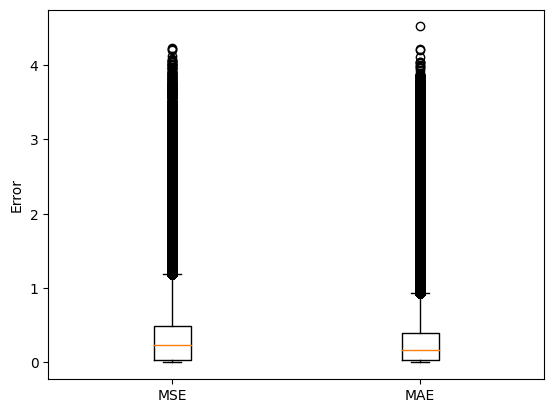

In [29]:
# labels = ["No embeddings", "Addition", "Concatenation"]
labels = ["MSE", "MAE"]
plt.boxplot(res, showfliers=True, labels=labels)
plt.ylabel("Error")
plt.savefig("Error boxplot MSExMAE")